# Regresión Lineal con Pruebas Paramétricas
Este notebook explica paso a paso cómo realizar una regresión lineal en Python usando `statsmodels` y cómo evaluar los supuestos clásicos mediante pruebas estadísticas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_csv('dataset_completo_con_ratios.csv')

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,lat,lon,geometry,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,0.941463,242.000,Base,752.243243,12.00,16.083333
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815.000,30.000,2.00,...,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000


In [5]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_weekday'] = df['publish_time'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['publish_month'] = df['publish_time'].dt.month
#df['publish_weekday'] = df['publish_time'].dt.day_name()
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio,publish_hour,publish_weekday,publish_month
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506,7,4,11
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546,6,6,11
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042,17,4,11
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,Sports,0.941463,242.000,Base,752.243243,12.00,16.083333,2,0,11
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815.000,30.000,2.00,...,News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000,1,0,11


## Simulación de datos

In [8]:
X = df[[
    'category_id', 'comment_count', 
    'ratings_disabled', 'video_error_or_removed','like_ratio',
    'publish_hour', 'publish_weekday'
]]
y = df['views']

## Ajuste del modelo OLS

In [11]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
model.summary()#r esta en ols

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Supuesto 1: Normalidad de los residuos (Shapiro-Wilk)

In [10]:
shapiro_test = stats.shapiro(model.resid)#prueba de hipotesis que evalua la normalidad de los residuos
print(f"W = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")#normalidad de los residuos comportamiento de campana de gauss, debe ser mayor a 0.5

NameError: name 'model' is not defined

## Supuesto 2: Homocedasticidad (Breusch-Pagan)

In [24]:
bp_test = het_breuschpagan(model.resid, model.model.exog)# manera aleatoria, buscar que p value sea mayor a 0.05
print(f"LM Stat = {bp_test[0]:.4f}, p-value = {bp_test[1]:.4f}")

LM Stat = 10.3144, p-value = 0.0668


## Supuesto 3: Independencia de residuos (Durbin-Watson)

In [25]:
dw_stat = durbin_watson(model.resid)#residuos no dependen de nadie, para eso el valor debe ser mayor a 2
print(f"Durbin-Watson = {dw_stat:.4f}")

Durbin-Watson = 2.0051


## Supuesto 4: Multicolinealidad (VIF)

In [26]:
vif = pd.DataFrame()
vif["variable"] = X_sm.columns
vif["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif#buscar que todos los valores sean menores a 5, caso contrario no se usa

,variable,VIF
0,const,143.857530
1,Avg. Area Income,1.001159
2,Avg. Area House Age,1.000577
3,Avg. Area Number of Rooms,1.273535
4,Avg. Area Number of Bedrooms,1.274413
5,Area Population,1.001266


## Visualización de residuos

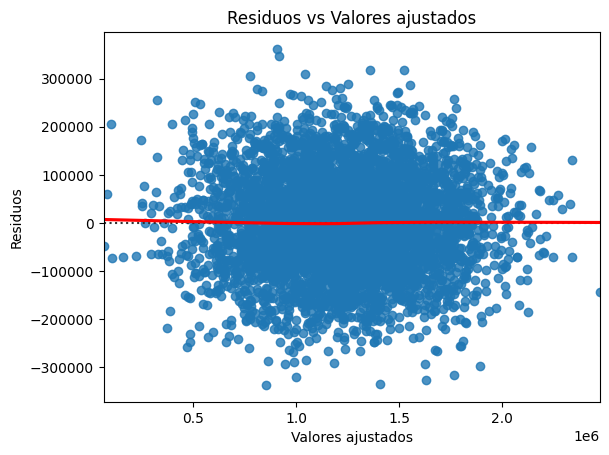

In [27]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores ajustados")
plt.show()#si tiene patron esta mal, caso contrario esta bien, si esta pegado/tiene patron esta sesgado